In [1]:
import pandas as pd
ipl_auction_df = pd.read_csv( r'C:\Users\Ankur Srivastava\Documents\IMT\MLAP\Predicition Techniques - SLR and MLR\IPL.csv' )

In [2]:
ipl_auction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [3]:
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [4]:
ipl_auction_df.iloc[0:5, 13:]

,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [5]:
X_features = ipl_auction_df.columns

In [6]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL']

In [7]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [8]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [9]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [10]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features],
columns = categorical_features,
drop_first = True )

In [11]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [12]:
X_features = ipl_auction_encoded_df.columns

In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 40 )

In [14]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            0.422     
Dependent Variable:         SOLD PRICE              AIC:                       2947.7800 
Date:                       2020-08-28 14:32        BIC:                       3032.4005 
No. Observations:           104                     Log-Likelihood:            -1441.9   
Df Model:                   31                      F-statistic:               3.424     
Df Residuals:               72                      Prob (F-statistic):        8.80e-06  
R-squared:                  0.596                   Scale:                     9.3245e+10
-----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                   370361.6859 206075.9885  1.7972 0.0765   -40443.2890  781166.6609
T-RUNS                     -76.9971     31.8398 -2.4183 0.0181     -140.4687     -13.5256
T-WKTS                     -27.8907    578.3576 -0.0482 0.9617    -1180.8254    1125.0441
ODI-RUNS-S                  80.7981     32.2043  2.5089 0.0144       16.6000     144.9962
ODI-SR-B                  -514.3789   1422.4725 -0.3616 0.7187    -3350.0260    2321.2681
ODI-WKTS                   824.7615    796.8329  1.0350 0.3041     -763.6960    2413.2189
ODI-SR-BL                 -527.0057   1398.3315 -0.3769 0.7074    -3314.5287    2260.5172
RUNS-S                     196.3187    148.7884  1.3194 0.1912     -100.2855     492.9228
HS                       -6815.3412   2566.5879 -2.6554 0.0097   -11931.7407   -1698.9417
AVE                      19514.8334   7373.5989  2.6466 0.0100     4815.8326   34213.8343
SR-B                        96.1539   1261.1688  0.0762 0.9394    -2417.9401    2610.2480
SIXERS                    1373.9557   3081.2526  0.4459 0.6570    -4768.4091    7516.3204
RUNS-C                     295.6752    297.8822  0.9926 0.3242     -298.1420     889.4925
WKTS                     -3252.5356   7258.6475 -0.4481 0.6554   -17722.3849   11217.3138
AVE-BL                   -3872.2987   9990.8335 -0.3876 0.6995   -23788.6613   16044.0640
ECON                    -10875.4106  12011.9598 -0.9054 0.3683   -34820.8149   13069.9937
SR-BL                     5575.7865  13560.7850  0.4112 0.6822   -21457.1442   32608.7172
AGE_2                  -283221.1792 111232.8245 -2.5462 0.0130  -504959.7623  -61482.5962
AGE_3                  -320964.3820 146802.2495 -2.1864 0.0320  -613609.3178  -28319.4461
COUNTRY_BAN             -60564.4030 402316.3556 -0.1505 0.8808  -862567.4000  741438.5939
COUNTRY_ENG             726855.0868 215788.8835  3.3684 0.0012   296687.8097 1157022.3640
COUNTRY_IND             107024.7386 107271.1138  0.9977 0.3218  -106816.3185  320865.7956
COUNTRY_NZ              336564.3048 176397.3626  1.9080 0.0604   -15077.4107  688206.0204
COUNTRY_PAK            -138708.4277 163677.4934 -0.8474 0.3996  -464993.5473  187576.6920
COUNTRY_SA                4378.4329 115370.6412  0.0380 0.9698  -225608.7370  234365.6028
COUNTRY_SL              -15709.1614 156657.2082 -0.1003 0.9204  -327999.5983  296581.2754
COUNTRY_WI             -187524.5040 175655.7599 -1.0676 0.2893  -537687.8617  162638.8536
COUNTRY_ZIM            -305780.7797 371434.9715 -0.8232 0.4131 -1046222.8627  434661.3032
PLAYING ROLE_Batsman    146260.6235 131173.2440  1.1150 0.2686  -115228.4592  407749.7062
PLAYING ROLE_Bowler      40404.1675 114156.0421  0.3539 0.7244  -187161.7434  267970.0784
PLAYING ROLE_W. Keeper   11866.9359 189739.3332  0.0625 0.9503  -366371.5119  390105.3838
CAPTAINCY EXP_1         115028.8154 115637.4632  0.9947 0.3232  -115490.2543  345547.8851
--------------------

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.as_matrix()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [18]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [19]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

NameError: name 'vif_factors' is not defined

In [20]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [22]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [23]:
get_vif_factors( X[X_new_features] )

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [24]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.740     
Dependent Variable:         SOLD PRICE         AIC:                           2953.4605 
Date:                       2020-08-28 14:36   BIC:                           3001.0595 
No. Observations:           104                Log-Likelihood:                -1458.7   
Df Model:                   18                 F-statistic:                   17.48     
Df Residuals:               86                 Prob (F-statistic):            1.77e-21  
R-squared (uncentered):     0.785              Scale:                         1.0792e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_ENG             679904.9258 203816.4780  3.3359 0.0013  274731.1774 1085078.6742
COUNTRY_SL               84931.2106 129429.3304  0.6562 0.5134 -172365.7825  342228.2038
COUNTRY_NZ              209279.3050 164265.7931  1.2740 0.2061 -117270.2841  535828.8940
ODI-WKTS                   863.7888    427.0505  2.0227 0.0462      14.8405    1712.7371
COUNTRY_WI             -156431.8271 165758.4021 -0.9437 0.3479 -485948.6245  173084.9704
COUNTRY_PAK             -71445.9133 150499.8790 -0.4747 0.6362 -370629.7707  227737.9441
PLAYING ROLE_Bowler      27330.6239  99528.5400  0.2746 0.7843 -170525.5652  225186.8130
CAPTAINCY EXP_1         202360.1798  91681.5311  2.2072 0.0300   20103.3282  384617.0315
COUNTRY_SA               98277.3785 101674.2802  0.9666 0.3365 -103844.4009  300399.1579
AGE_3                   -73522.2641  95071.3763 -0.7733 0.4414 -262517.9051  115473.3769
ODI-SR-BL                  770.9867   1175.1430  0.6561 0.5135   -1565.1202    3107.0935
COUNTRY_BAN            -166120.6443 345972.1949 -0.4802 0.6323 -853890.6048  521649.3162
SIXERS                    5812.5537   1757.7292  3.3069 0.0014    2318.3036    9306.8037
COUNTRY_ZIM             -82749.7991 369094.8152 -0.2242 0.8231 -816486.0075  650986.4093
PLAYING ROLE_Batsman    216783.7679  93158.7254  2.3270 0.0223   31590.3510  401977.1848
WKTS                      2334.4391   1949.7419  1.1973 0.2345   -1541.5195    6210.3976
PLAYING ROLE_W. Keeper  -28719.3982 151078.0214 -0.1901 0.8497 -329052.5647  271613.7683
COUNTRY_IND             278258.3118  89587.3331  3.1060 0.0026  100164.5879  456352.0357
----------------------------------------------------------------------------------------
Omnibus:                       9.896               Durbin-Watson:                  1.920
Prob(Omnibus):                 0.007               Jarque-Bera (JB):               9.829
Skew:                          0.699               Prob(JB):                       0.007
Kurtosis:                      3.560               Condition No.:                  1526 
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [25]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.697     
Dependent Variable:     SOLD PRICE       AIC:                         2957.3299 
Date:                   2020-08-28 14:37 BIC:                         2967.9075 
No. Observations:       104              Log-Likelihood:              -1474.7   
Df Model:               4                F-statistic:                 60.74     
Df Residuals:           100              Prob (F-statistic):          6.29e-26  
R-squared (uncentered): 0.708            Scale:                       1.2609e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       440252.7969  63413.9066 6.9425 0.0000 314441.4124  566064.1815
COUNTRY_ENG       746529.3042 209483.0682 3.5637 0.0006 330920.8634 1162137.7451
SIXERS              6740.0404   1509.2611 4.4658 0.0000   3745.7094    9734.3714
CAPTAINCY EXP_1   368995.3771  72660.5883 5.0783 0.0000 224838.8394  513151.9149
--------------------------------------------------------------------------------
Omnibus:                   0.826             Durbin-Watson:                1.685
Prob(Omnibus):             0.662             Jarque-Bera (JB):             0.764
Skew:                      0.205             Prob(JB):                     0.683
Kurtosis:                  2.914             Condition No.:                175  
================================================================================

"""

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
get_ipython().run_line_magic('matplotlib', 'inline')
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();


<Figure size 576x432 with 0 Axes>

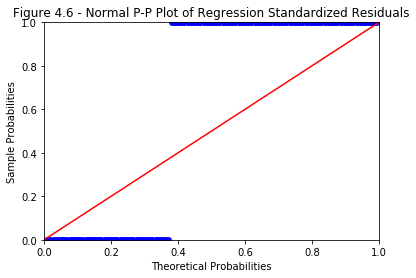

In [27]:
draw_pp_plot( ipl_model_3,"Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals");

In [28]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")
    plt.show()

In [29]:

plot_resid_fitted( ipl_model_3.fittedvalues,
                  ipl_model_3.resid,
                  "Figure 4.7 - Residual Plot");

NameError: name 'get_standardized_values' is not defined

In [30]:
k = train_X.shape[1]
n = train_X.shape[0]


In [31]:
print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 4  and number of observations: 104


In [32]:

k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 4  and number of observations: 104
Cutoff for leverage value:  0.144


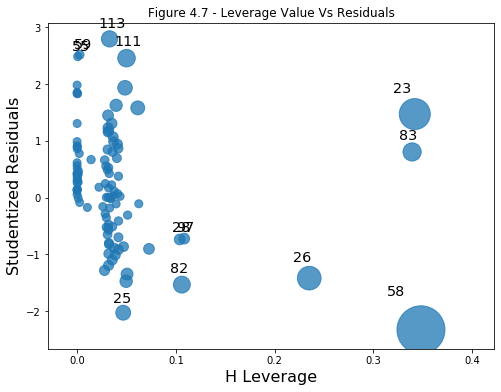

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()


In [34]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [35]:
train_X_new = train_X.drop( [23, 58, 83], axis = 0)
train_y_new = train_y.drop( [23, 58, 83], axis = 0)

In [36]:
import numpy as np
train_y = np.sqrt( train_y )

In [37]:

ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.729     
Dependent Variable:     SOLD PRICE       AIC:                         1529.2190 
Date:                   2020-08-28 14:38 BIC:                         1539.7965 
No. Observations:       104              Log-Likelihood:              -760.61   
Df Model:               4                F-statistic:                 70.97     
Df Residuals:           100              Prob (F-statistic):          2.34e-28  
R-squared (uncentered): 0.740            Scale:                       1.3710e+05
----------------------------------------------------------------------------------
                       Coef.     Std.Err.     t      P>|t|     [0.025      0.975] 
----------------------------------------------------------------------------------
COUNTRY_IND           521.1884    66.1233   7.8821   0.0000   390.0018    652.3751
COUNTRY_ENG           566.9601   218.4332   2.5956   0.0109   133.5948   1000.3253
SIXERS                  7.4639     1.5737   4.7428   0.0000     4.3417     10.5862
CAPTAINCY EXP_1       429.5088    75.7650   5.6690   0.0000   279.1932    579.8244
--------------------------------------------------------------------------------
Omnibus:                    0.108             Durbin-Watson:               1.205
Prob(Omnibus):              0.947             Jarque-Bera (JB):            0.204
Skew:                       -0.073            Prob(JB):                    0.903
Kurtosis:                   2.839             Condition No.:               175  
================================================================================

"""

<Figure size 576x432 with 0 Axes>

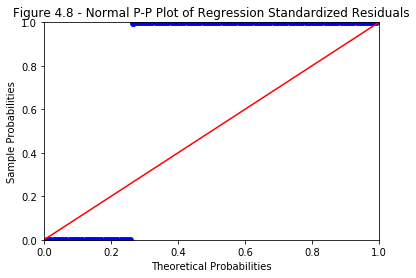

In [38]:
draw_pp_plot( ipl_model_4,"Figure 4.8 - Normal P-P Plot of Regression Standardized Residuals");

In [39]:
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)

In [40]:

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

447068.4617545526

In [41]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.45